In [5]:
import pandas as pd

# Load analysis-ready data
df = pd.read_excel("/content/rbi_analysis_ready.xlsx")

# Convert date column
df["Week_ended"] = pd.to_datetime(df["Week_ended"])

# Quick validation
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Week_ended           913 non-null    datetime64[ns]
 1   yesr                 913 non-null    int64         
 2   economic_period      913 non-null    object        
 3   call_money           913 non-null    int64         
 4   notice_money         913 non-null    int64         
 5   Term_money           913 non-null    int64         
 6   triparty_repo        913 non-null    int64         
 7   market_repo          913 non-null    int64         
 8   repo_corporate_bond  626 non-null    float64       
 9   forex_usd_mn         911 non-null    float64       
 10  govt_dated_sec       913 non-null    int64         
 11  state_govt_sec       913 non-null    int64         
 12  total_govt_sec       910 non-null    float64       
 13  tb_91_day            913 non-null  

(  Week_ended  yesr economic_period  call_money  notice_money  Term_money  \
 0 2025-09-26  2025       2020-2025       31298           656        1038   
 1 2025-09-19  2025       2020-2025       34205          7384        1259   
 2 2025-09-12  2025       2020-2025       31808           426        2350   
 3 2025-09-05  2025       2020-2025       20066          6430         967   
 4 2025-08-29  2025       2020-2025       27549          9328        1360   
 
    triparty_repo  market_repo  repo_corporate_bond  forex_usd_mn  \
 0         738792       681777              15960.0      140364.0   
 1         857666       811438              14021.0      125999.0   
 2         681101       623329              11061.0      128636.0   
 3         559054       510321               7895.0      103733.0   
 4         880736       776484              12741.0      143071.0   
 
    govt_dated_sec  state_govt_sec  total_govt_sec  tb_91_day  tb-182_day  \
 0          131047            7932        1

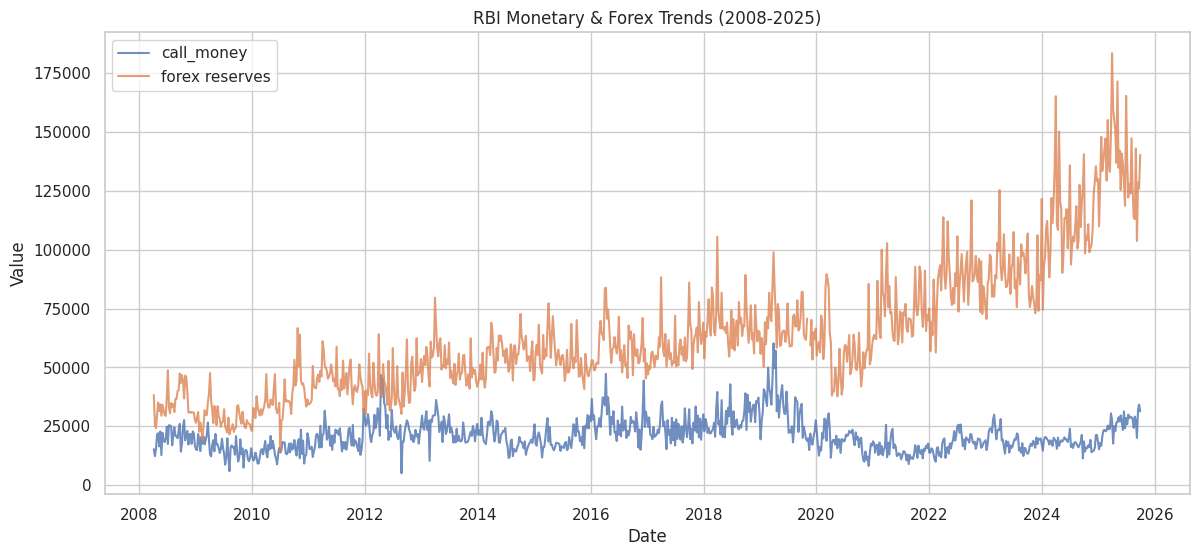

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set(style="whitegrid")

plt.figure(figsize=(14,6))
plt.plot(df["Week_ended"], df["call_money"], label="call_money" , alpha=0.8)
plt.plot(df["Week_ended"], df["forex_usd_mn"], label="forex reserves", alpha=0.8)
plt.title("RBI Monetary & Forex Trends (2008-2025)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

In [7]:
period_summary=(df.groupby("economic_period")[["call_money" , "forex_usd_mn"]]
                .mean()
                .reset_index()
                )

period_summary

,economic_period,call_money,forex_usd_mn
0,2008-2011,17495.280612,36264.928571
1,2012-2015,22091.725962,51135.211538
2,2016-2019,27652.076555,63424.309179
3,2020-2025,18644.096667,90884.216667


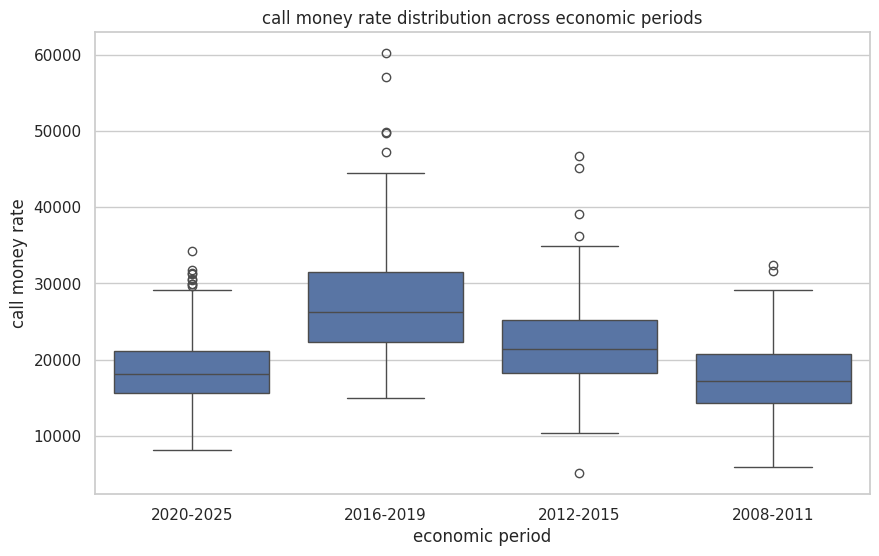

In [8]:
plt.figure(figsize=(10,6))
sb.boxplot(data=df , x="economic_period", y="call_money")
plt.title("call money rate distribution across economic periods")
plt.xlabel("economic period")
plt.ylabel("call money rate")
plt.show()

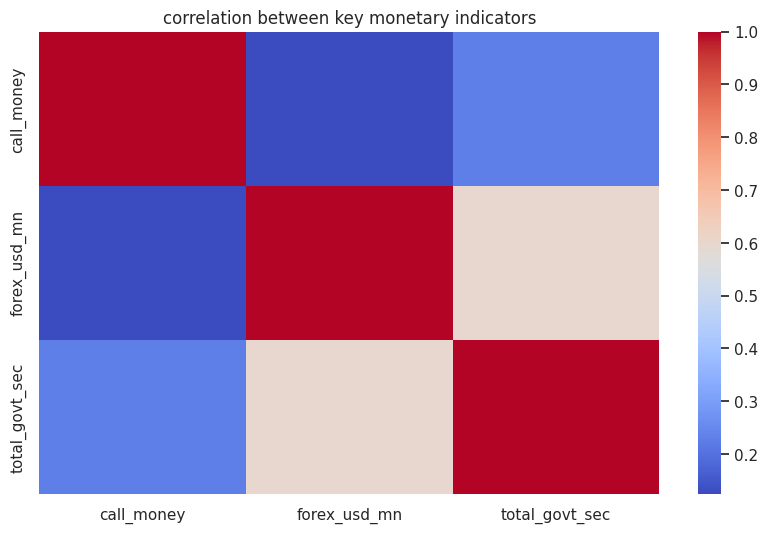

In [10]:
corr=df[["call_money", "forex_usd_mn", "total_govt_sec"]].corr()

plt.figure(figsize=(10,6))
sb.heatmap(corr, annot=False , cmap="coolwarm")
plt.title("correlation between key monetary indicators")
plt.show()